# Digit Recognition using MNIST Data set

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
#load the data set
(x,y),(x_test,y_test)=keras.datasets.mnist.load_data()

In [29]:
len(x)

60000

In [30]:
len(y)

60000

Scaling our vales for getting high accuracy


In [62]:
x=x/255
x_test=x_test/255

In [63]:
x

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [64]:
x[0].shape

(28, 28)

In [65]:
y[0]

5

In [66]:
y_test[0].shape

()

In [67]:
print ('The first element of y is: ', y[0])
print ('The last element of y is: ', y[-1])

The first element of y is:  5
The last element of y is:  8


In [68]:
print ('The shape of X is: ' + str(x.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (60000, 28, 28)
The shape of y is: (60000,)


# Visualizing the Data

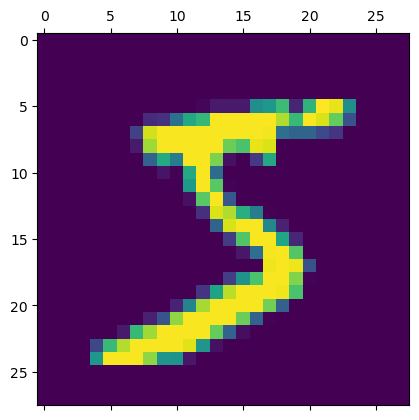

In [69]:
plt.matshow(x[0])

# Converting 2D array into 1D

In [70]:
x_flattened=x.reshape(len(x),28*28)
x_testflattened=x_test.reshape(len(x_test),28*28)

In [71]:
x_flattened.shape

(60000, 784)

In [72]:
x_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [73]:
x_testflattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

#  Model representation
The neural network you will use in this assignment is shown in the figure below.

This has two dense layers with ReLU activations followed by an output layer with a linear activation.
Recall that our inputs are pixel values of digit images.
Since the images are of size  28×28
 , this gives us  784
  inputs

The parameters have dimensions that are sized for a neural network with  25
  units in layer 1,  15
  units in layer 2 and  10
  output units in layer 3, one for each digit.

Recall that the dimensions of these parameters is determined as follows:

If network has  𝑠𝑖𝑛
  units in a layer and  𝑠𝑜𝑢𝑡
  units in the next layer, then
𝑊
  will be of dimension  𝑠𝑖𝑛×𝑠𝑜𝑢𝑡
 .
𝑏
  will be a vector with  𝑠𝑜𝑢𝑡
  elements
Therefore, the shapes of W, and b, are

layer1: The shape of W1 is (784, 25) and the shape of b1 is (25,)
layer2: The shape of W2 is (25, 15) and the shape of b2 is: (15,)
layer3: The shape of W3 is (15, 10) and the shape of b3 is: (10,)

Tensorflow Model Implementation
Tensorflow models are built layer by layer. A layer's input dimensions (𝑠𝑖𝑛
 above) are calculated for you. You specify a layer's output dimensions and this determines the next layer's input dimension. The input dimension of the first layer is derived from the size of the input data specified in the model.fit statement below.

Note: It is also possible to add an input layer that specifies the input dimension of the first layer. For example:
tf.keras.Input(shape=(784,)),    #specify input shape
We will include that here to illuminate some model sizing.

In [74]:
model=Sequential([
    tf.keras.Input(shape=(784,)),
    Dense(units=25,activation='relu'),
    Dense(units=15,activation='relu'),
    Dense(units=10,activation='linear'),    
])

In [75]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 25)             │        19,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,175 (78.81 KB)

 Trainable params: 20,175 (78.81 KB)

 Non-trainable params: 0 (0.00 B)

# Checking the weights and Bias

In [76]:
[layer1,layer2,layer3]=model.layers

In [77]:
W1,b1=layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


Softmax placement
The final Dense layer should use a 'linear' activation. This is effectively no activation.
The model.compile statement will indicate this by including from_logits=True. loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) 
This does not impact the form of the target. In the case of SparseCategorialCrossentropy, the target is the expected digit, 0-9.
Using the model:

The outputs are not probabilities. If output probabilities are desired, apply a softmax function.

In [78]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
model.fit(x_flattened,y,epochs=40)
    


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 730us/step - accuracy: 0.7789 - loss: 0.7389
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 728us/step - accuracy: 0.9377 - loss: 0.2145
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step - accuracy: 0.9509 - loss: 0.1683
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step - accuracy: 0.9576 - loss: 0.1452
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 706us/step - accuracy: 0.9637 - loss: 0.1258
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - accuracy: 0.9663 - loss: 0.1153
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step - accuracy: 0.9698 - loss: 0.1011
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 711us/step - accuracy: 0.9723 - loss: 0.0944
Epoch 9/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 734us/step - accuracy: 0.9750 - loss: 0.0852
Epoch 10/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 721us/step - accuracy: 0.9766 - loss: 0.0797
Epoch 11/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step - accuracy: 0.9776 - loss: 0.0746
Epoch 12

In [79]:
model.evaluate(x_flattened,y)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 562us/step - accuracy: 0.9889 - loss: 0.0323


[0.032735783606767654, 0.9886333346366882]

In [80]:
y_hat=model.predict(x_flattened)
y_hat[0]

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step


array([-24.674202 ,   2.2407732,  -5.056487 ,  20.570202 , -22.037895 ,
        25.814205 , -57.231915 ,  -7.3311143, -14.133448 ,   4.214925 ],
      dtype=float32)

# Predicting the numbers

In [81]:
np.argmax(y_hat[0])

5

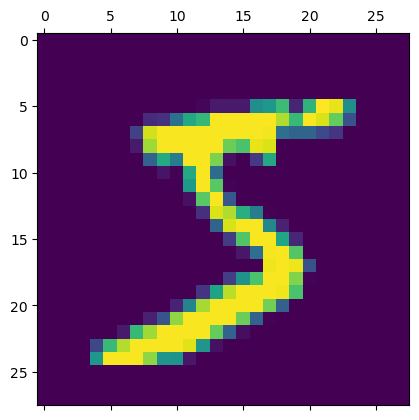

In [86]:
plt.matshow(x[0])

In [87]:
np.argmax(y_hat[1])

0

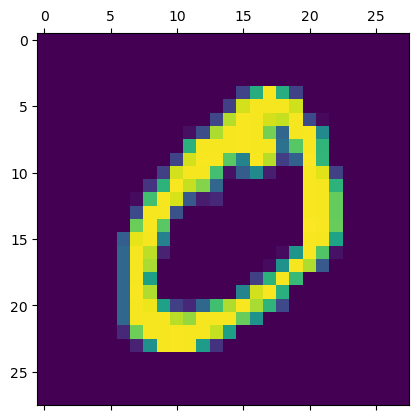

In [88]:
plt.matshow(x[1])

In [92]:
y_hat_labels=[np.argmax(i) for i in y_hat]

In [93]:
y_hat_labels[::1]

[5,
 0,
 4,
 1,
 9,
 2,
 1,
 3,
 1,
 4,
 3,
 5,
 3,
 6,
 1,
 7,
 2,
 8,
 6,
 9,
 4,
 0,
 9,
 1,
 1,
 2,
 4,
 3,
 2,
 7,
 3,
 8,
 6,
 9,
 0,
 5,
 6,
 0,
 7,
 6,
 1,
 8,
 7,
 9,
 3,
 9,
 8,
 5,
 9,
 3,
 3,
 0,
 7,
 4,
 9,
 8,
 0,
 9,
 4,
 1,
 4,
 4,
 6,
 0,
 4,
 5,
 6,
 1,
 0,
 0,
 1,
 7,
 1,
 6,
 3,
 0,
 2,
 1,
 1,
 7,
 8,
 0,
 2,
 6,
 7,
 8,
 3,
 9,
 0,
 4,
 6,
 7,
 4,
 6,
 8,
 0,
 7,
 8,
 3,
 1,
 5,
 7,
 1,
 7,
 1,
 1,
 6,
 3,
 0,
 2,
 9,
 3,
 1,
 1,
 0,
 4,
 9,
 2,
 0,
 0,
 2,
 0,
 2,
 7,
 1,
 8,
 6,
 4,
 1,
 6,
 3,
 4,
 3,
 9,
 1,
 3,
 3,
 8,
 5,
 4,
 7,
 7,
 4,
 2,
 8,
 5,
 8,
 6,
 2,
 3,
 4,
 6,
 1,
 9,
 9,
 6,
 0,
 3,
 7,
 2,
 8,
 2,
 9,
 4,
 4,
 6,
 4,
 9,
 7,
 0,
 9,
 2,
 9,
 5,
 1,
 5,
 9,
 1,
 2,
 3,
 2,
 3,
 5,
 9,
 1,
 7,
 6,
 2,
 8,
 2,
 2,
 5,
 0,
 7,
 4,
 9,
 7,
 8,
 3,
 2,
 1,
 1,
 8,
 3,
 6,
 1,
 0,
 3,
 1,
 0,
 0,
 1,
 7,
 2,
 7,
 3,
 5,
 4,
 6,
 5,
 2,
 6,
 4,
 7,
 1,
 8,
 9,
 9,
 3,
 0,
 7,
 1,
 0,
 2,
 0,
 3,
 5,
 4,
 6,
 5,
 8,
 6,
 3,
 7,
 5,
 8,
 0,
 9,
 1,
 0,


In [94]:
len(y_hat_labels)

60000

In [96]:
confus_mat=tf.math.confusion_matrix(labels=y,predictions=y_hat_labels)
confus_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[5868,    0,    3,    0,    0,    6,   12,    1,   32,    1],
       [   0, 6732,    2,    1,    0,    1,    0,    1,    5,    0],
       [   2,    5, 5918,   14,    0,    0,    0,    0,   18,    1],
       [   0,    6,   16, 6003,    0,   35,    0,    3,   66,    2],
       [   3,   27,   19,    3, 5680,    7,   23,   12,   17,   51],
       [   0,    0,    1,    5,    0, 5390,    0,    1,   23,    1],
       [   1,    4,    2,    0,    0,   18, 5862,    0,   31,    0],
       [   0,   16,   18,    2,    0,    3,    0, 6194,   16,   16],
       [   0,    3,    5,    2,    0,    7,    2,    0, 5831,    1],
       [   5,    8,    3,    5,    3,   14,    0,   10,   61, 5840]])>

Text(95.72222222222221, 0.5, 'Truth')

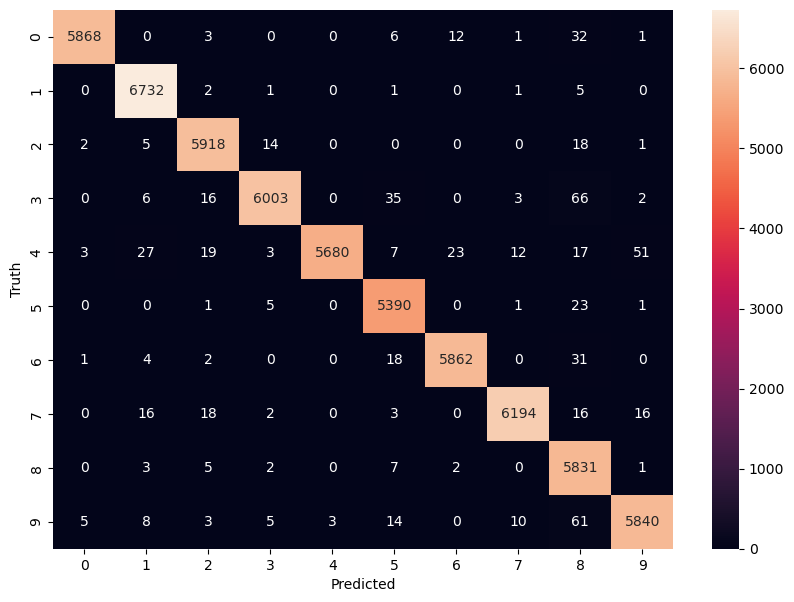

In [97]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(confus_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')